In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Load the data and infer the date format for the date features

df = pd.read_csv('BikeSales-Dusty2.csv', 
                  parse_dates=['First_Seen','Last_Seen','Last_Modified'], 
                  infer_datetime_format=True)



In [3]:
df.head()

,ABS,Adjustable_Seat,Bike,Body,Bore,Cam_Type,Carburettor,Carburettor(s),Charging_Method,Clutch_Type,...,Valves_Per_Cylinder,Warranty_KMs,Warranty_in_Months_from_First_Registration,Wet_Operational_Weight,Wheel_Type,Wheelbase,Width,Windscreen,Release_Year,Seller
0,No,No,Kuda Pro 250,Adventure Touring,62.000,SOHC (Single Over Head Cam),NaN,1.0,Alternator & Regulator-Rectifier,Multi plate,...,4.0,No,3,150.0,Other,1480.0,860.000,Standard,2009,Private
1,No,No,250 R Road Manual 5sp 250cc,Super Sport,77.000,SOHC (Single Over Head Cam),NaN,1.0,Engine,Multi plate,...,4.0,No,0,136.0,9-Spoke,1350.0,818.262,Standard,2013,Private
2,No,No,GN250,Naked,72.000,SOHC (Single Over Head Cam),NaN,1.0,Engine,NaN,...,4.0,No,0,141.0,NaN,1504.0,818.500,Standard,1991,Private
3,No,No,GSX1100 ESD Road Manual 5sp 1100cc,Sport Touring,74.319,DOHC (Double Over Head Cam),Constant velocity,4.0,Engine,NaN,...,4.0,No,0,254.0,NaN,1439.0,769.659,Standard,1984,Private
4,No,No,TS250 Trail Manual 5sp 250cc,Trail,81.500,Reed Valve,NaN,1.0,Engine,NaN,...,4.0,No,0,141.0,NaN,1400.0,818.262,Standard,1976,Private


In [4]:
#######################################################################
### DELETE CELL WHEN MACHINE LEARNING IMPUTATION HAS BEEN COMPLETED ###
#######################################################################

# The EDA notebook will eventually perform machine learning on these features to impute the missing values.
# Just so there isn't any issues with the data for feature engineering, i'l be using the most common value.

df['Body'][df['Body'].isnull() == True] = df['Body'].mode()[0]
df['Carburettor'][df['Carburettor'].isnull() == True] = df['Carburettor'].mode()[0]
df['Clutch_Type'][df['Clutch_Type'].isnull() == True] = df['Clutch_Type'].mode()[0]
df['Country_of_Origin'][df['Country_of_Origin'].isnull() == True] = df['Country_of_Origin'].mode()[0]
df['Drive_Type'][df['Drive_Type'].isnull() == True] = df['Drive_Type'].mode()[0]
df['Frame_Material'][df['Frame_Material'].isnull() == True] = df['Frame_Material'].mode()[0]
df['Front_Brake_Description'][df['Front_Brake_Description'].isnull() == True] = df['Front_Brake_Description'].mode()[0]
df['Front_Suspension'][df['Front_Suspension'].isnull() == True] = df['Front_Suspension'].mode()[0]
df['Rear_Brake_Description'][df['Rear_Brake_Description'].isnull() == True] = df['Rear_Brake_Description'].mode()[0]
df['Rear_Suspension'][df['Rear_Suspension'].isnull() == True] = df['Rear_Suspension'].mode()[0]
df['Wheel_Type'][df['Wheel_Type'].isnull() == True] = df['Wheel_Type'].mode()[0]

df['Kilometers'][df['Kilometers'].isnull() == True] = df['Kilometers'].mean()


df['Body'][df['Body'].str.contains('MY') == True] = \
    df['Body'][df['Body'].str.contains('MY') == True].str.split().str[:-1].str.join(' ');


In [5]:
df.isnull().sum().sum()

0

## Brand
This is the manufacturer of the vehicle and is the same as the Make of the bike. This is a common way to distinguish between bike at the simplest level. 


In [6]:
# Features to extract from the data
# Brand, model, Age, 
df['Brand'] = df['URL'].str.split('/').str[5].str.split('-').str[1].str.capitalize()

# Replace known names with more than one word, like Harley Davidson
df['Brand'][df['Brand'] == 'Harley'] = 'Harley Davidson'
df['Brand'][df['Brand'] == 'Mv'] = 'MV Agusta'
df['Brand'][df['Brand'] == 'Royal'] = 'Royal Enfield'
df['Brand'][df['Brand'] == 'Moto'] = 'Moto Guzzi'
df['Brand'][df['Brand'] == 'Can'] = 'Can Am'




## Model
This describes the Brand of the bike in more detail, providing a slightly more complex discription. 

In [7]:
df['Model'] = df['URL'].str.split('/').str[5].str.split('-').str[2:].str.join(' ').str.capitalize()

# Need to deal with the models that have two word, like Harley Davidson
df['Model'][df['Model'].str.contains('Davidson') == True] = \
    df['Model'][df['Model'].str.contains('Davidson') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Agusta') == True] = \
    df['Model'][df['Model'].str.contains('Agusta') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Enfield') == True] = \
    df['Model'][df['Model'].str.contains('Enfield') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Guzzi') == True] = \
    df['Model'][df['Model'].str.contains('Guzzi') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Am') == True] = \
    df['Model'][df['Model'].str.contains('Am') == True].str.split().str[1:].str.join(' ');



In [8]:
# Remove the MY YY from the end of the Model description.
# This is the effective year, the bike was registerd on the road
df['Model'][df['Model'].str.contains('my') == True] = \
    df['Model'][df['Model'].str.contains('my') == True].str.split().str[:-1].str.join(' ');
df['Model'][df['Model'].str.contains('MY') == True] = \
    df['Model'][df['Model'].str.contains('MY') == True].str.split().str[:-1].str.join(' ');


## Age
Any asset decreasing in value with age. We can deterime the age using todays date and the release year.

In [9]:
df['Age'] = datetime.now().year - df['Release_Year']

## Time to Sale
This will be the time it takes to sell the bike. We can assume the bike is sold if the last time the advertisement was seen, isn't the most recent time. ie, the advertisement has been taken down. We will assume this means the bike has been sold, even though the seller could have decided to not sell the bike.

In [10]:
days = (df['Last_Seen'] - df['First_Seen'])
df['Time_to_Sale'] = days.astype('timedelta64[D]')

# Correct for bike that have not been sold yet
df['Time_to_Sale'][(df['Last_Seen'] == df['Last_Seen'].max()) == True] = 0


In [11]:

df.to_csv('Bikesales_Features.csv',index=False)

In [12]:
# Create some supporting plotting functions
def plot_scatter_grid(data, possible_predictors,col=4):
    
    row = int(len(possible_predictors)/col)+1
    
    
    target = data['Price']
    fig = plt.figure(figsize=(20,row*4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for idx, predictor in enumerate(possible_predictors):
        ax = fig.add_subplot(row, col, idx+1)
        plt.scatter(data[predictor], target, s=1)
        ax.set_title(predictor)
        
def plot_distribution_grid(data, possible_predictors,col=4):
    
    row = int(len(possible_predictors)/col)+1
    
    target = data['Price']
    fig = plt.figure(figsize=(20,row*4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for idx, predictor in enumerate(possible_predictors):
        plot_data = data[predictor][data[predictor].isnull() == False]
        ax = fig.add_subplot(row, col, idx+1)
        sns.distplot(plot_data)
        ax.set_title(predictor)
        
def plot_box_grid(data, possible_predictors,col=4):
    
    row = int(len(possible_predictors)/col)+1
    
    target = data['Price']
    fig = plt.figure(figsize=(20,row*4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for idx, predictor in enumerate(possible_predictors):
        ax = fig.add_subplot(row, col, idx+1)
        sns.boxplot(x=data[predictor])
        ax.set_title(predictor)


def plot_correlation_matrix(data,figsize=(15,15)):
    corr_mat=data.corr(method='pearson')
    plt.figure(figsize=figsize)
    sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
    

In [13]:
sport = df[df['Body'].str.contains('Sport') == True]
sport.shape


(5343, 95)

In [14]:
def scatter(data,x,y,hue=None,title='',figsize=(12,10)):
    ax = plt.figure(figsize=figsize)
    sns.scatterplot(x=x,y=y,hue=hue,data=data);
    plt.title(title,fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



def count_plot(data, feature,figsize=(12,10)):
    ax = data[feature].value_counts().sort_values().plot(kind='bar',figsize=figsize);
    ax.set_xlabel(feature);
    ax.set_ylabel('Counts');
    ax.set_title('Distribution of '+feature);
  
    
    


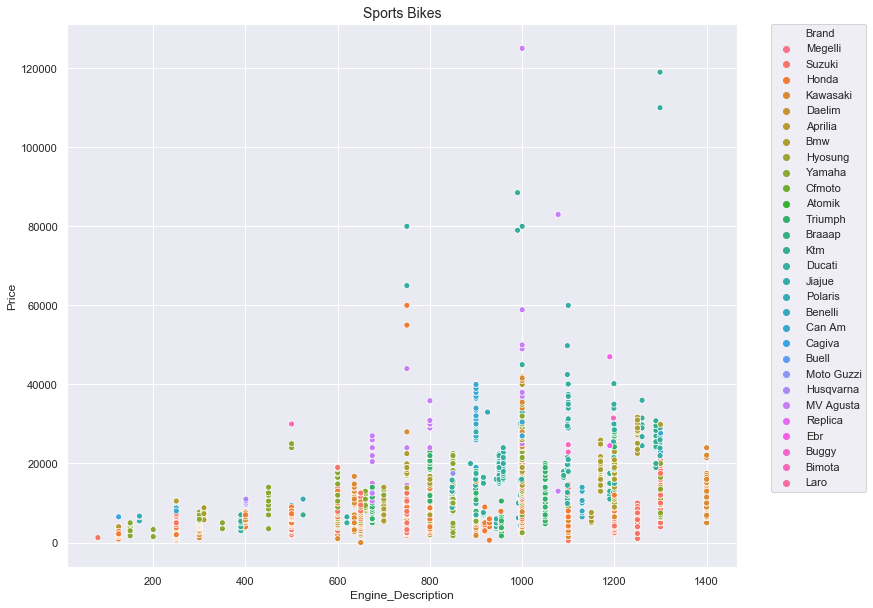

In [15]:
scatter(sport,'Engine_Description','Price',hue='Brand',title='Sports Bikes')

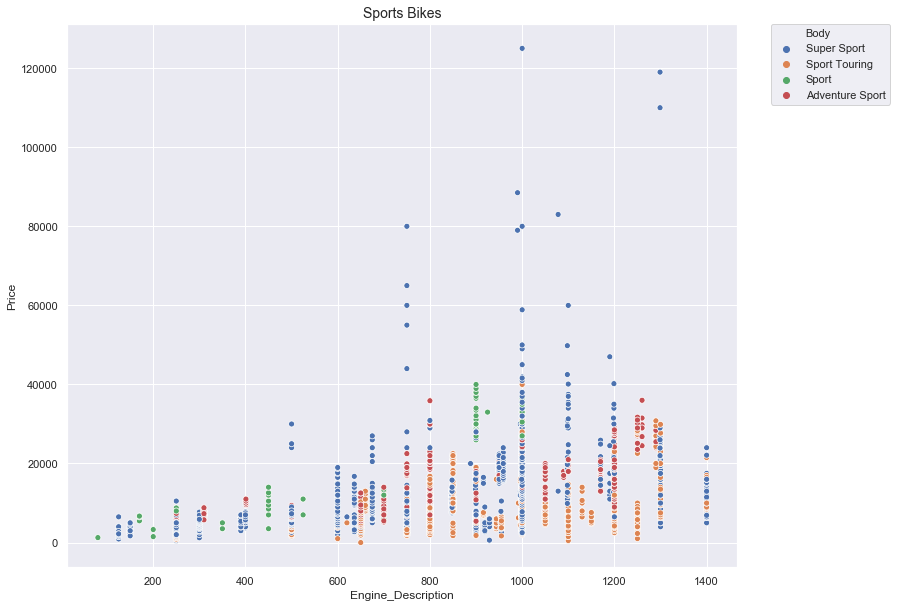

In [16]:
scatter(sport,'Engine_Description','Price',hue='Body',title='Sports Bikes')

In [17]:
sport_600 = sport[(sport['Engine_Description'] > 550) & (sport['Engine_Description'] < 700)]
print (sport_600.shape)

(1065, 95)


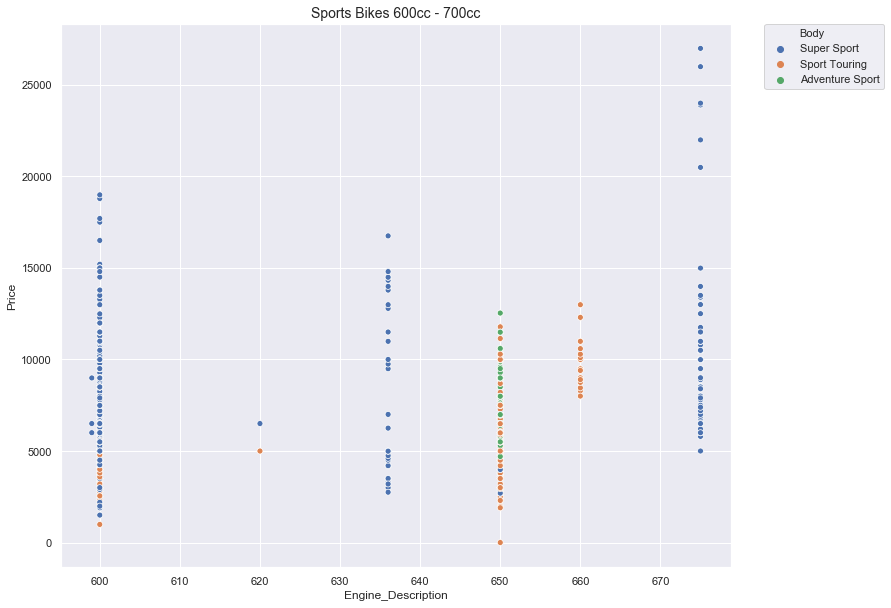

In [18]:
scatter(sport_600,'Engine_Description','Price',hue='Body',title='Sports Bikes 600cc - 700cc')




In [19]:
supersport = df[df['Body'].str.contains('Super Sport') == True]
supersport.shape

(3133, 95)

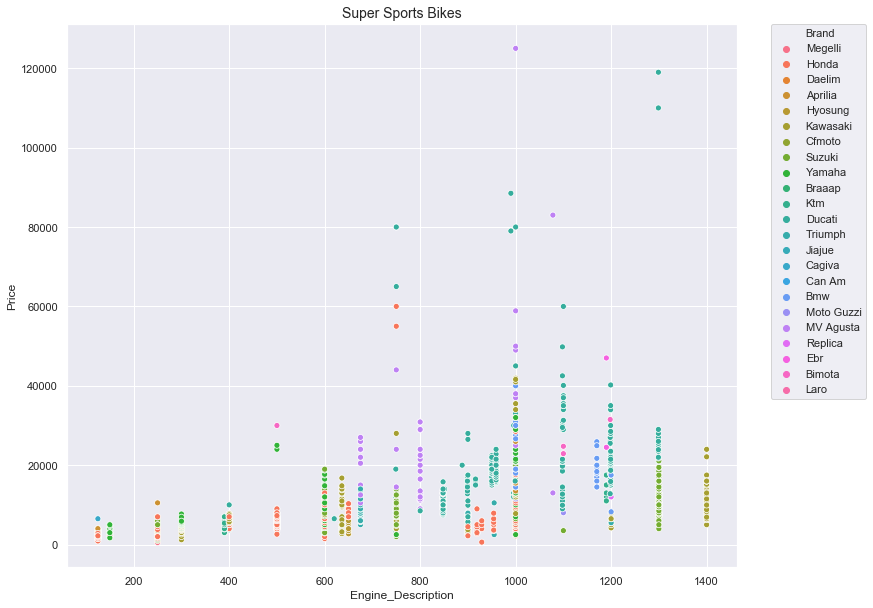

In [20]:
scatter(supersport,'Engine_Description','Price',hue='Brand',title='Super Sports Bikes')


In [21]:
supersport['Body'].unique()

array(['Super Sport'], dtype=object)

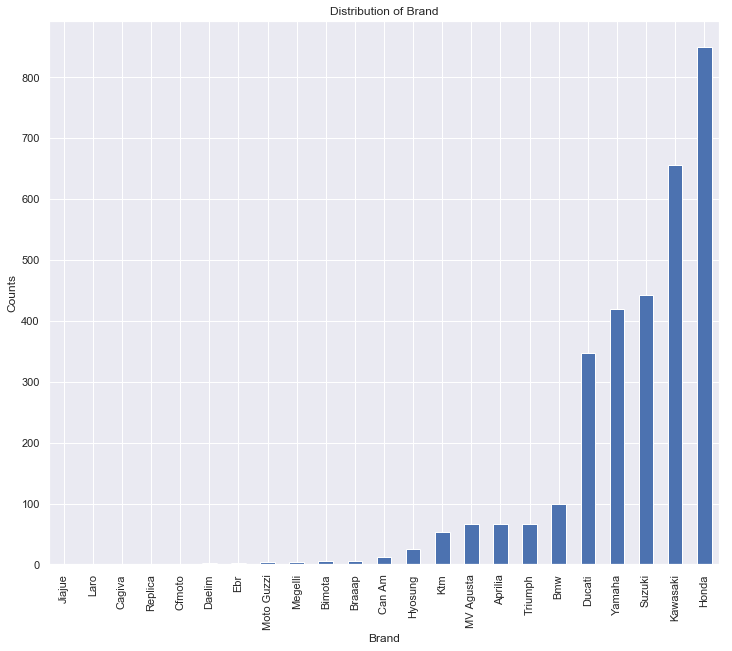

In [22]:
  
count_plot(supersport, 'Brand',figsize=(12,10))

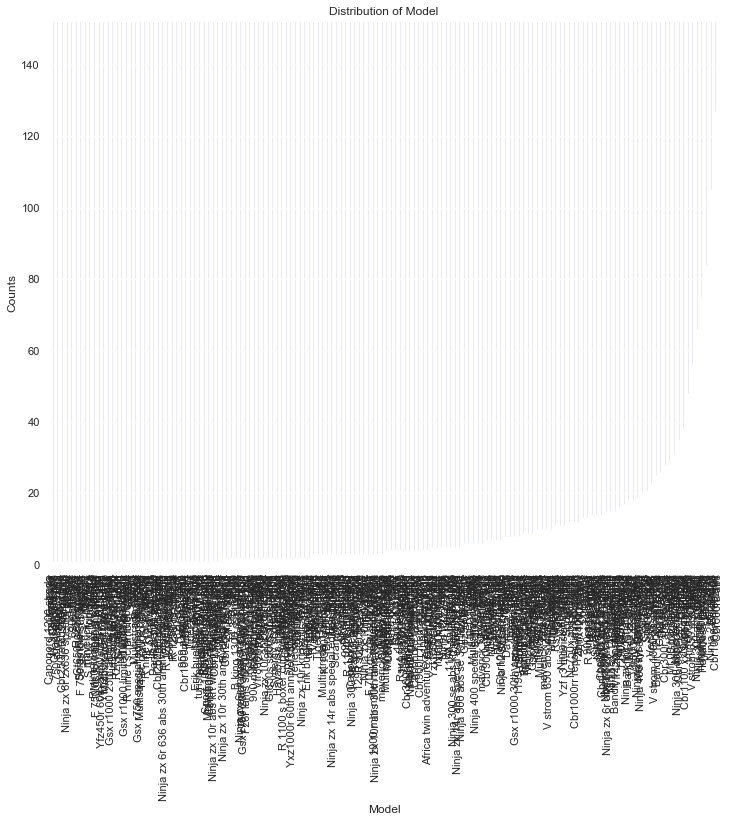

In [23]:
count_plot(sport, 'Model', figsize=(12,10))

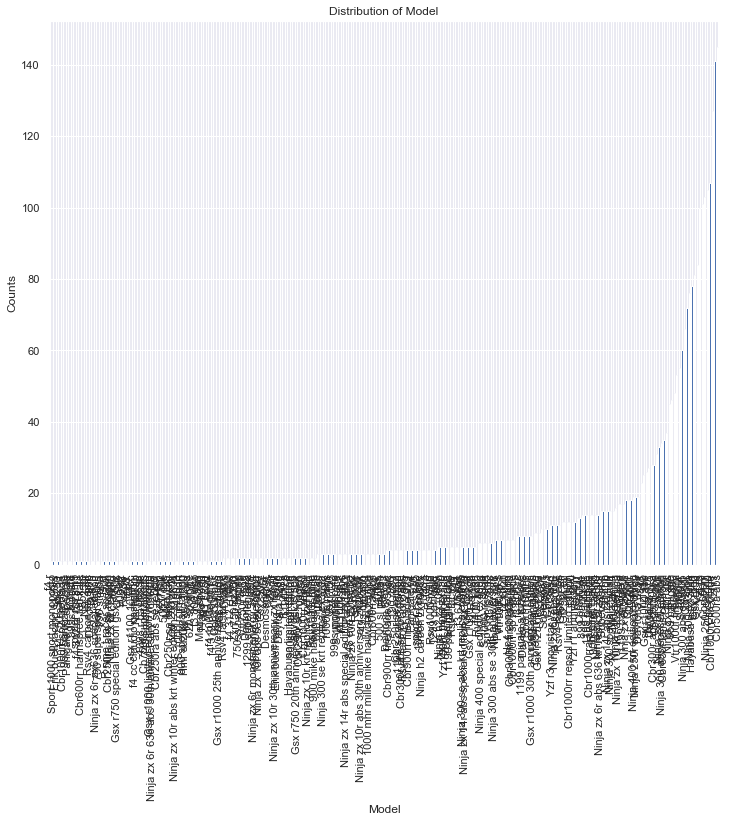

In [24]:
count_plot(supersport, 'Model', figsize=(12,10))

In [25]:
list(supersport['Model'].unique())

['250 r',
 'Cbr900rr fireblade 929',
 'Cbr125r',
 'Vjf250',
 'Rs 125',
 'Gt250r efi',
 'Ninja 250r ex250j',
 'Ninja 250r special edition',
 'V night',
 'Cbr600 f',
 'Cbr250r',
 'Cbr250rr',
 'Cbr600rr',
 'Ninja zx 6r zx600',
 'Gsx r750',
 'Yzf r15',
 'Yzf r6',
 'Vtr1000f firestorm',
 'Zx 2r',
 'Rs4 125 4t',
 'Cbr600f4i',
 'Yzf r125',
 'Cbr250r abs',
 'Ninja 300 abs special edition',
 'Zx6r',
 'Zx 9r',
 'Gsxr750',
 'Gt650r efi',
 'Gsx r600',
 'Ninja 300 abs ex300b',
 'Ninja 300 special edition',
 'Cbr250r se repsol',
 'Cbr300r abs cbr300ra',
 'Gsx r125 gsx r125a',
 'Moto3',
 'Cbr900rr fireblade 919',
 'Cbr300r',
 'Ninja 300 ex300a',
 'Ninja zx 6r zx636',
 'Rc 390',
 'Yzf1000r thunderace',
 '750ss half fairing',
 'Gt650rl',
 'Ninja zx 6r zx600r',
 'Gsx r1000',
 'Gsx r1100 1074cc',
 'Tt600',
 '400ss',
 'Cb750f super sports',
 'Cbr1000rr fireblade',
 'Yzf r3',
 'Yzf r1',
 'Cbr500r',
 'Cbr300r abs se cbr300rase',
 'Cbr500ra abs',
 'Cbr900rr fireblade 893cc',
 'Hayabusa gsx1300r',
 '750ss ful

In [26]:
yamahaSport = supersport[supersport['Brand'] == 'Yamaha']
suzukisport = supersport[supersport['Brand'] == 'Suzuki']
hondaSport = supersport[supersport['Brand'] == 'Honda']
kawasakiSport = supersport[supersport['Brand'] == 'Kawasaki']


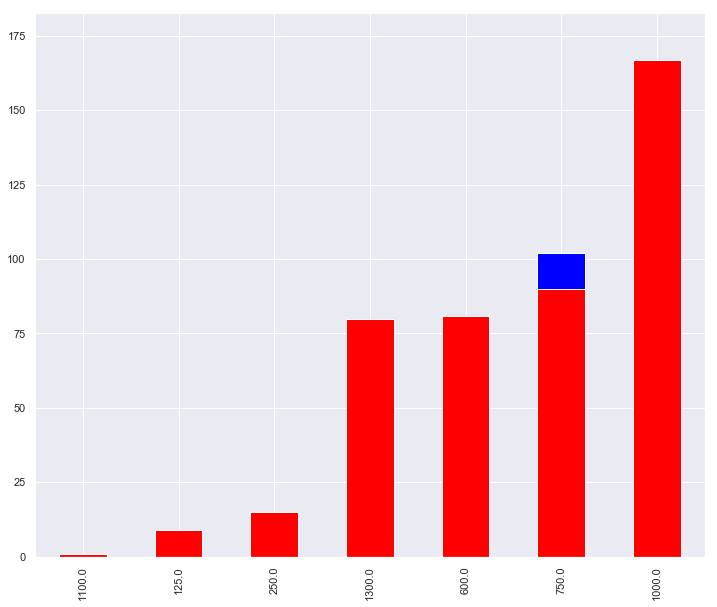

In [44]:
figsize=(12,10)
ax = yamahaSport['Engine_Description'].value_counts().sort_values().plot(kind='bar',figsize=figsize,color='blue');
suzukisport['Engine_Description'].value_counts().sort_values().plot(kind='bar',figsize=figsize,color='red')






In [89]:
s = supersport.groupby(by=['Brand','Engine_Description'])['Engine_Description'].count()
df = s.to_frame(name='count').reset_index()
groups = df.groupby(by='Brand')['count'].sum()

df['total'] = 0
for brand in groups.index:
    df['total'][df['Brand'] == brand] = groups[brand] 

    
df.sort_values(by='total',ascending=False,inplace=True)
df2 = df[df['total'] >= df['total'].unique()[4]].reset_index()

df2.head()


,index,Brand,Engine_Description,count,total
0,50,Honda,750.0,3,850
1,41,Honda,125.0,37,850
2,43,Honda,250.0,131,850
3,44,Honda,300.0,50,850
4,45,Honda,400.0,9,850


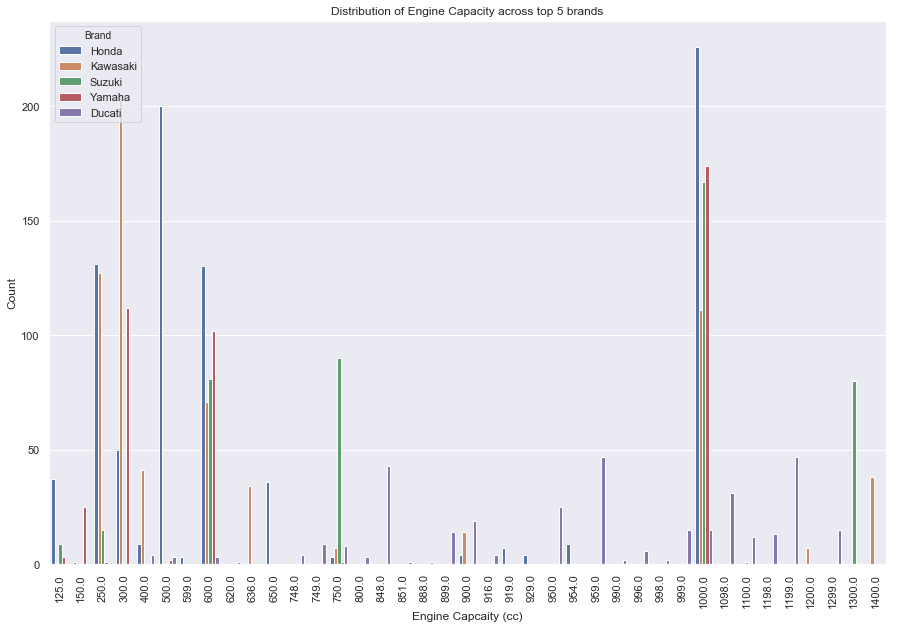

In [98]:
ax = plt.figure(figsize=(15,10))
sns.barplot(x='Engine_Description',y='count',hue='Brand',data=df2)
plt.xticks(rotation=90)
plt.title('Distribution of Engine Capacity across top 5 brands')
plt.xlabel('Engine Capcaity (cc)')
plt.ylabel('Count');

In [140]:
out, bins = pd.cut(df2['Engine_Description'], bins=25,retbins=True)
df2['bin'] = out
df2.groupby(by=['Brand','bin'])['count'].sum()

Brand     bin             
Ducati    (380.0, 431.0]        4
          (482.0, 533.0]        3
          (584.0, 635.0]        4
          (737.0, 788.0]       21
          (788.0, 839.0]        3
          (839.0, 890.0]       45
          (890.0, 941.0]       37
          (941.0, 992.0]       74
          (992.0, 1043.0]      38
          (1094.0, 1145.0]     43
          (1196.0, 1247.0]     60
          (1298.0, 1349.0]     15
Honda     (123.725, 176.0]     38
          (227.0, 278.0]      131
          (278.0, 329.0]       50
          (380.0, 431.0]        9
          (482.0, 533.0]      200
          (584.0, 635.0]      133
          (635.0, 686.0]       36
          (737.0, 788.0]        3
          (890.0, 941.0]       15
          (941.0, 992.0]        9
          (992.0, 1043.0]     226
Kawasaki  (227.0, 278.0]      127
          (278.0, 329.0]      205
          (380.0, 431.0]       41
          (584.0, 635.0]       71
          (635.0, 686.0]       34
          (737.0, 788

In [139]:
df2.head()

,index,Brand,Engine_Description,count,total,bin
0,50,Honda,750.0,3,850,"(737.0, 788.0]"
1,41,Honda,125.0,37,850,"(123.725, 176.0]"
2,43,Honda,250.0,131,850,"(227.0, 278.0]"
3,44,Honda,300.0,50,850,"(278.0, 329.0]"
4,45,Honda,400.0,9,850,"(380.0, 431.0]"


(5, 10)

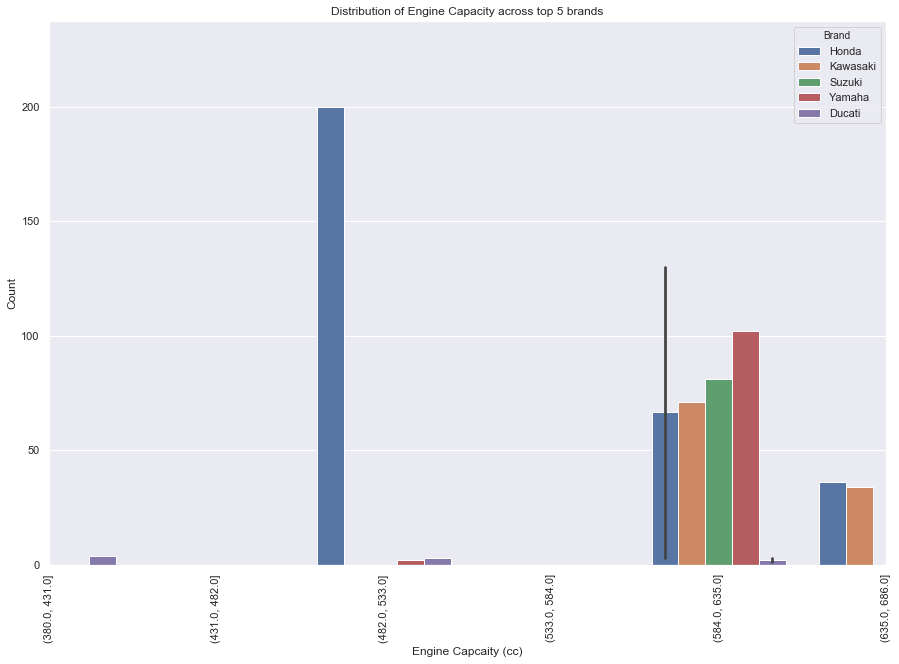

In [132]:

ax = plt.figure(figsize=(15,10))
sns.barplot(x='bin',y='count',hue='Brand',data=df2)
plt.xticks(rotation=90)
plt.title('Distribution of Engine Capacity across top 5 brands')
plt.xlabel('Engine Capcaity (cc)')
plt.ylabel('Count');
#plt.xlim(5,10)

In [135]:

    
    
#df2.head()
    
    

,index,Brand,Engine_Description,count,total,bin
6,47,Honda,599.0,3,850,"(584.0, 635.0]"
7,48,Honda,600.0,130,850,"(584.0, 635.0]"
19,63,Kawasaki,636.0,34,655,"(635.0, 686.0]"
20,62,Kawasaki,600.0,71,655,"(584.0, 635.0]"
29,83,Suzuki,600.0,81,443,"(584.0, 635.0]"
37,98,Yamaha,600.0,102,420,"(584.0, 635.0]"
43,16,Ducati,600.0,3,347,"(584.0, 635.0]"
44,17,Ducati,620.0,1,347,"(584.0, 635.0]"


In [29]:
possible_predictors = list(df.select_dtypes(include='number').columns)

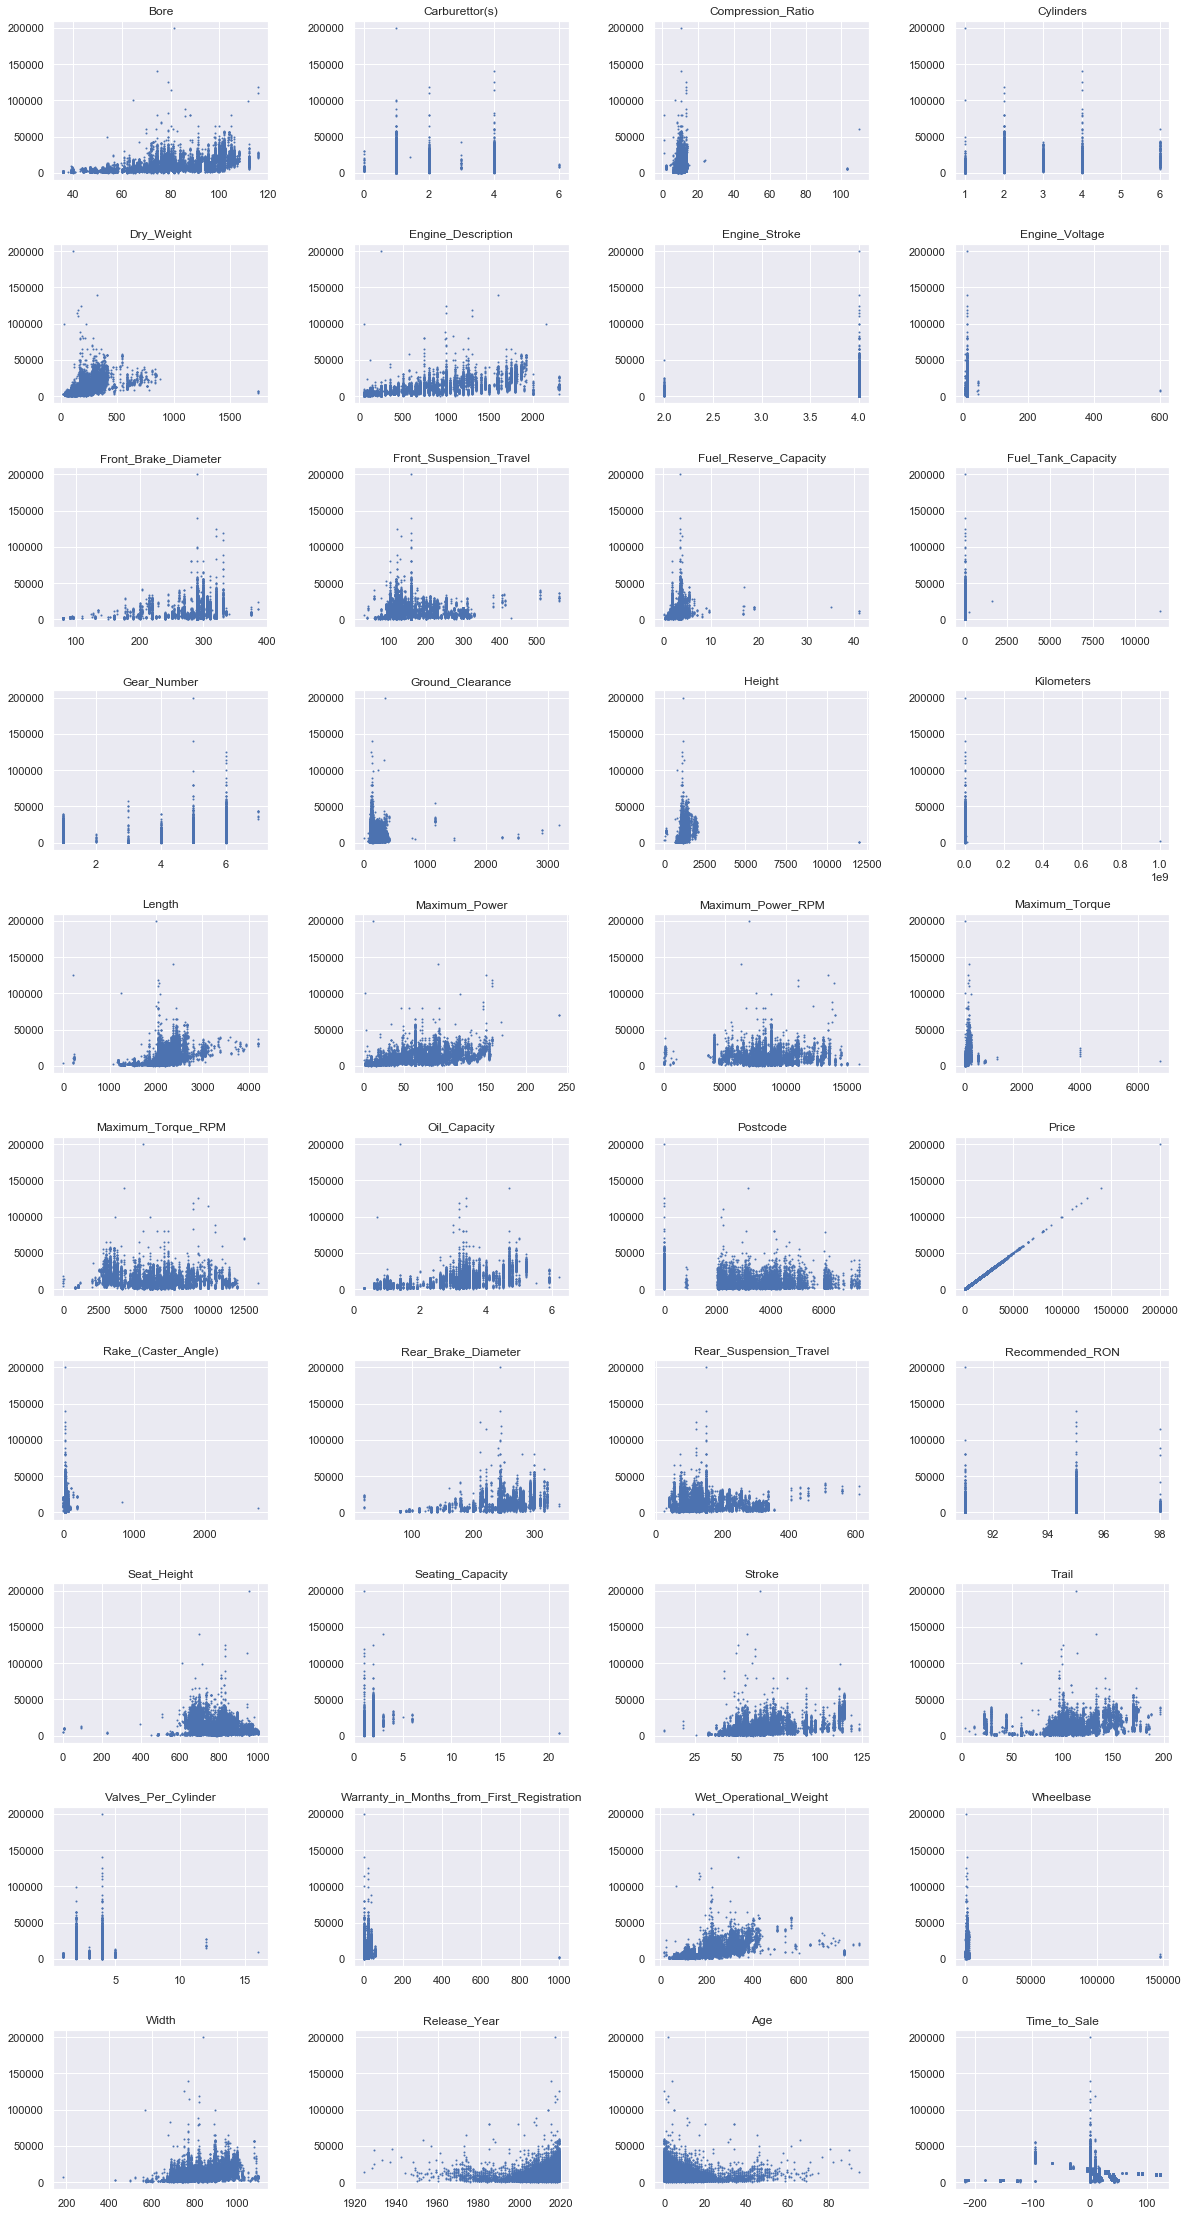

In [30]:

plot_scatter_grid(df, possible_predictors,col=4)

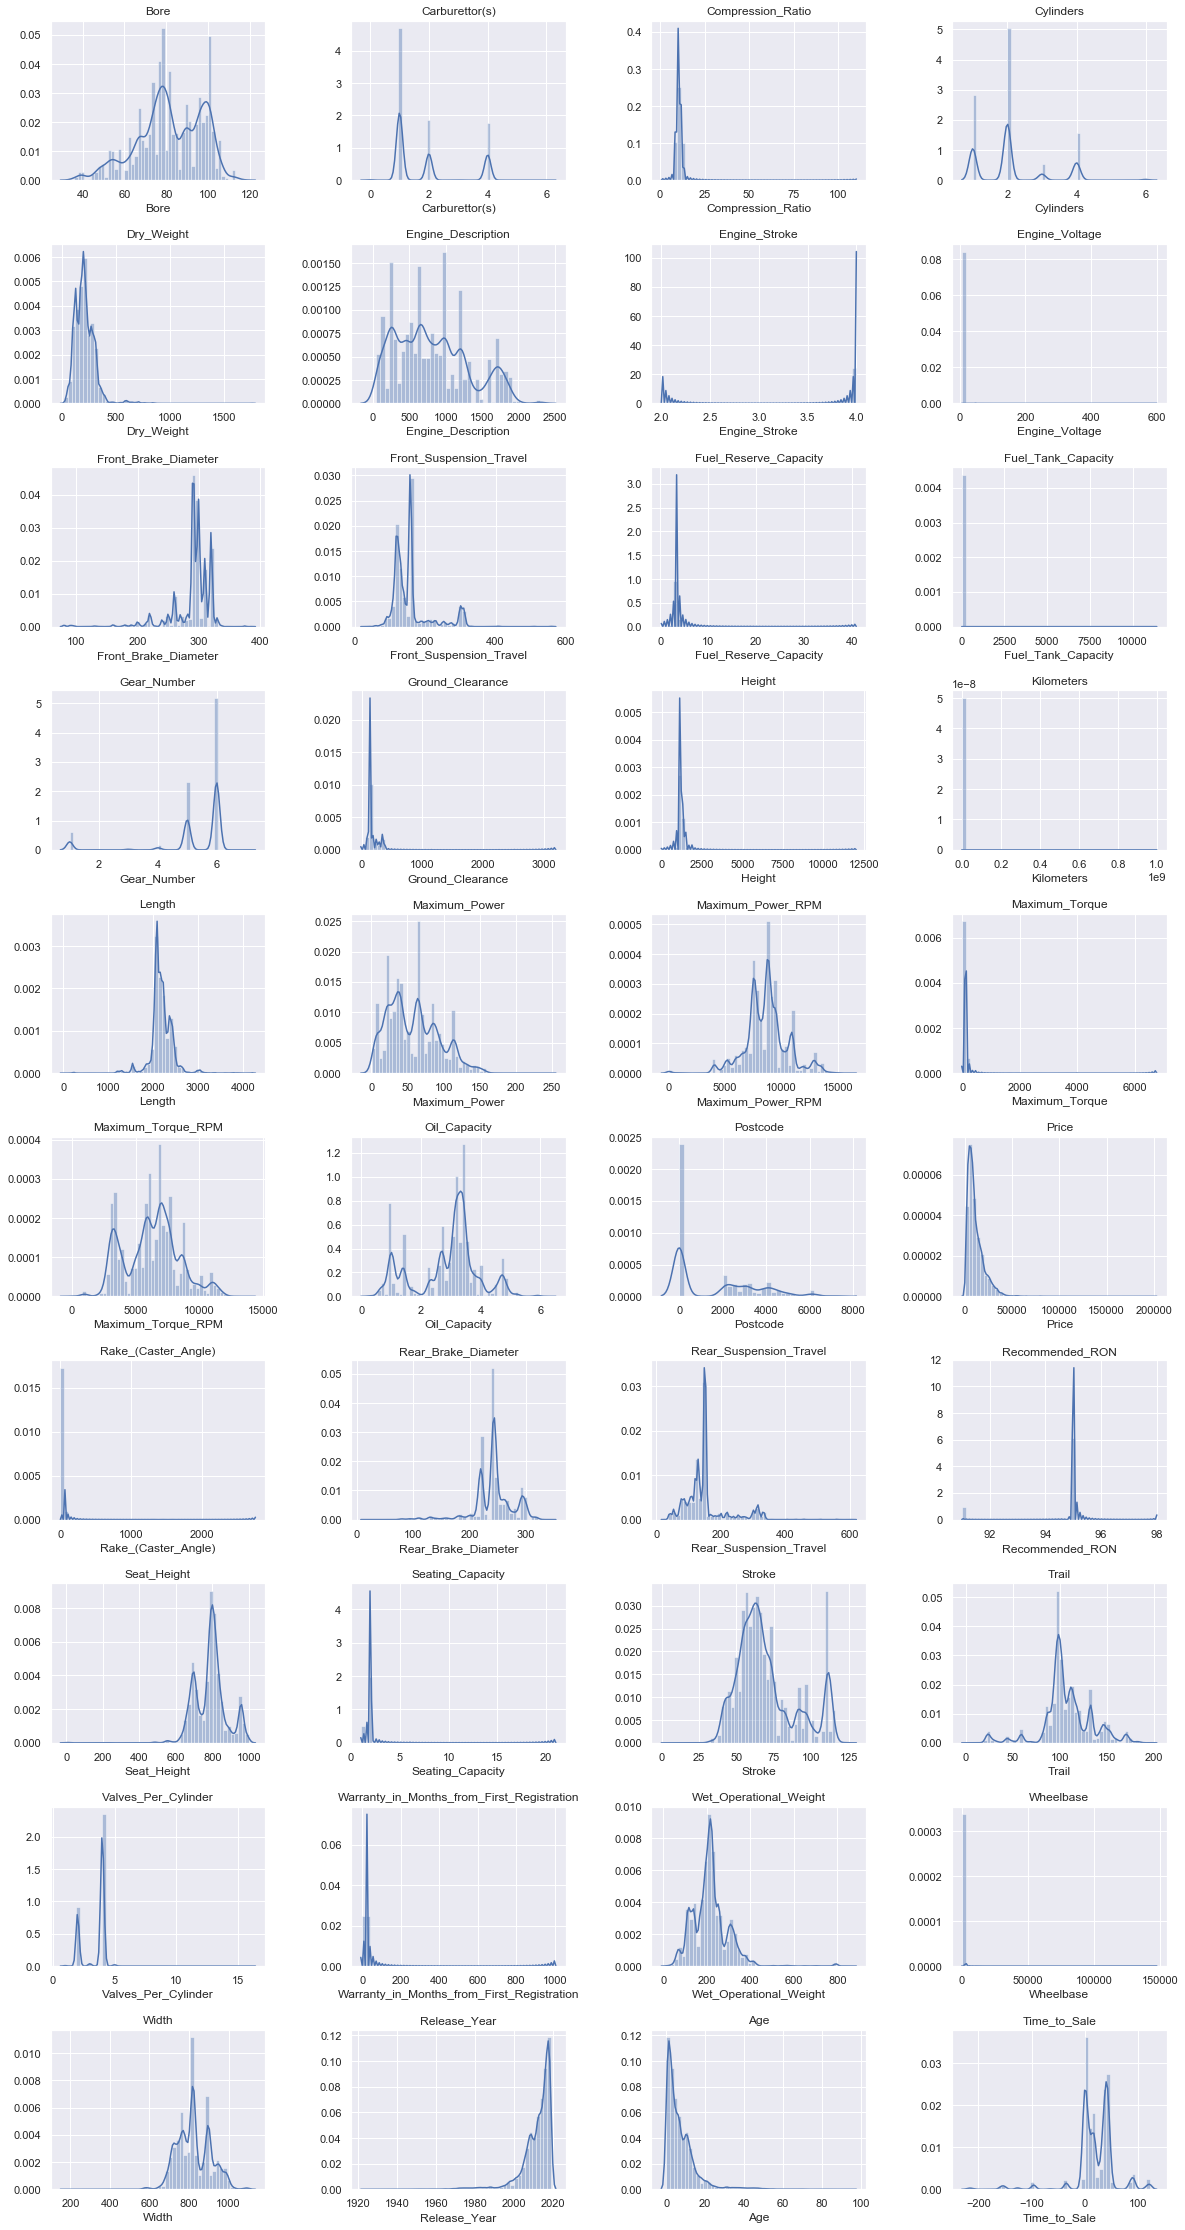

In [31]:
plot_distribution_grid(df, possible_predictors,col=4)
        


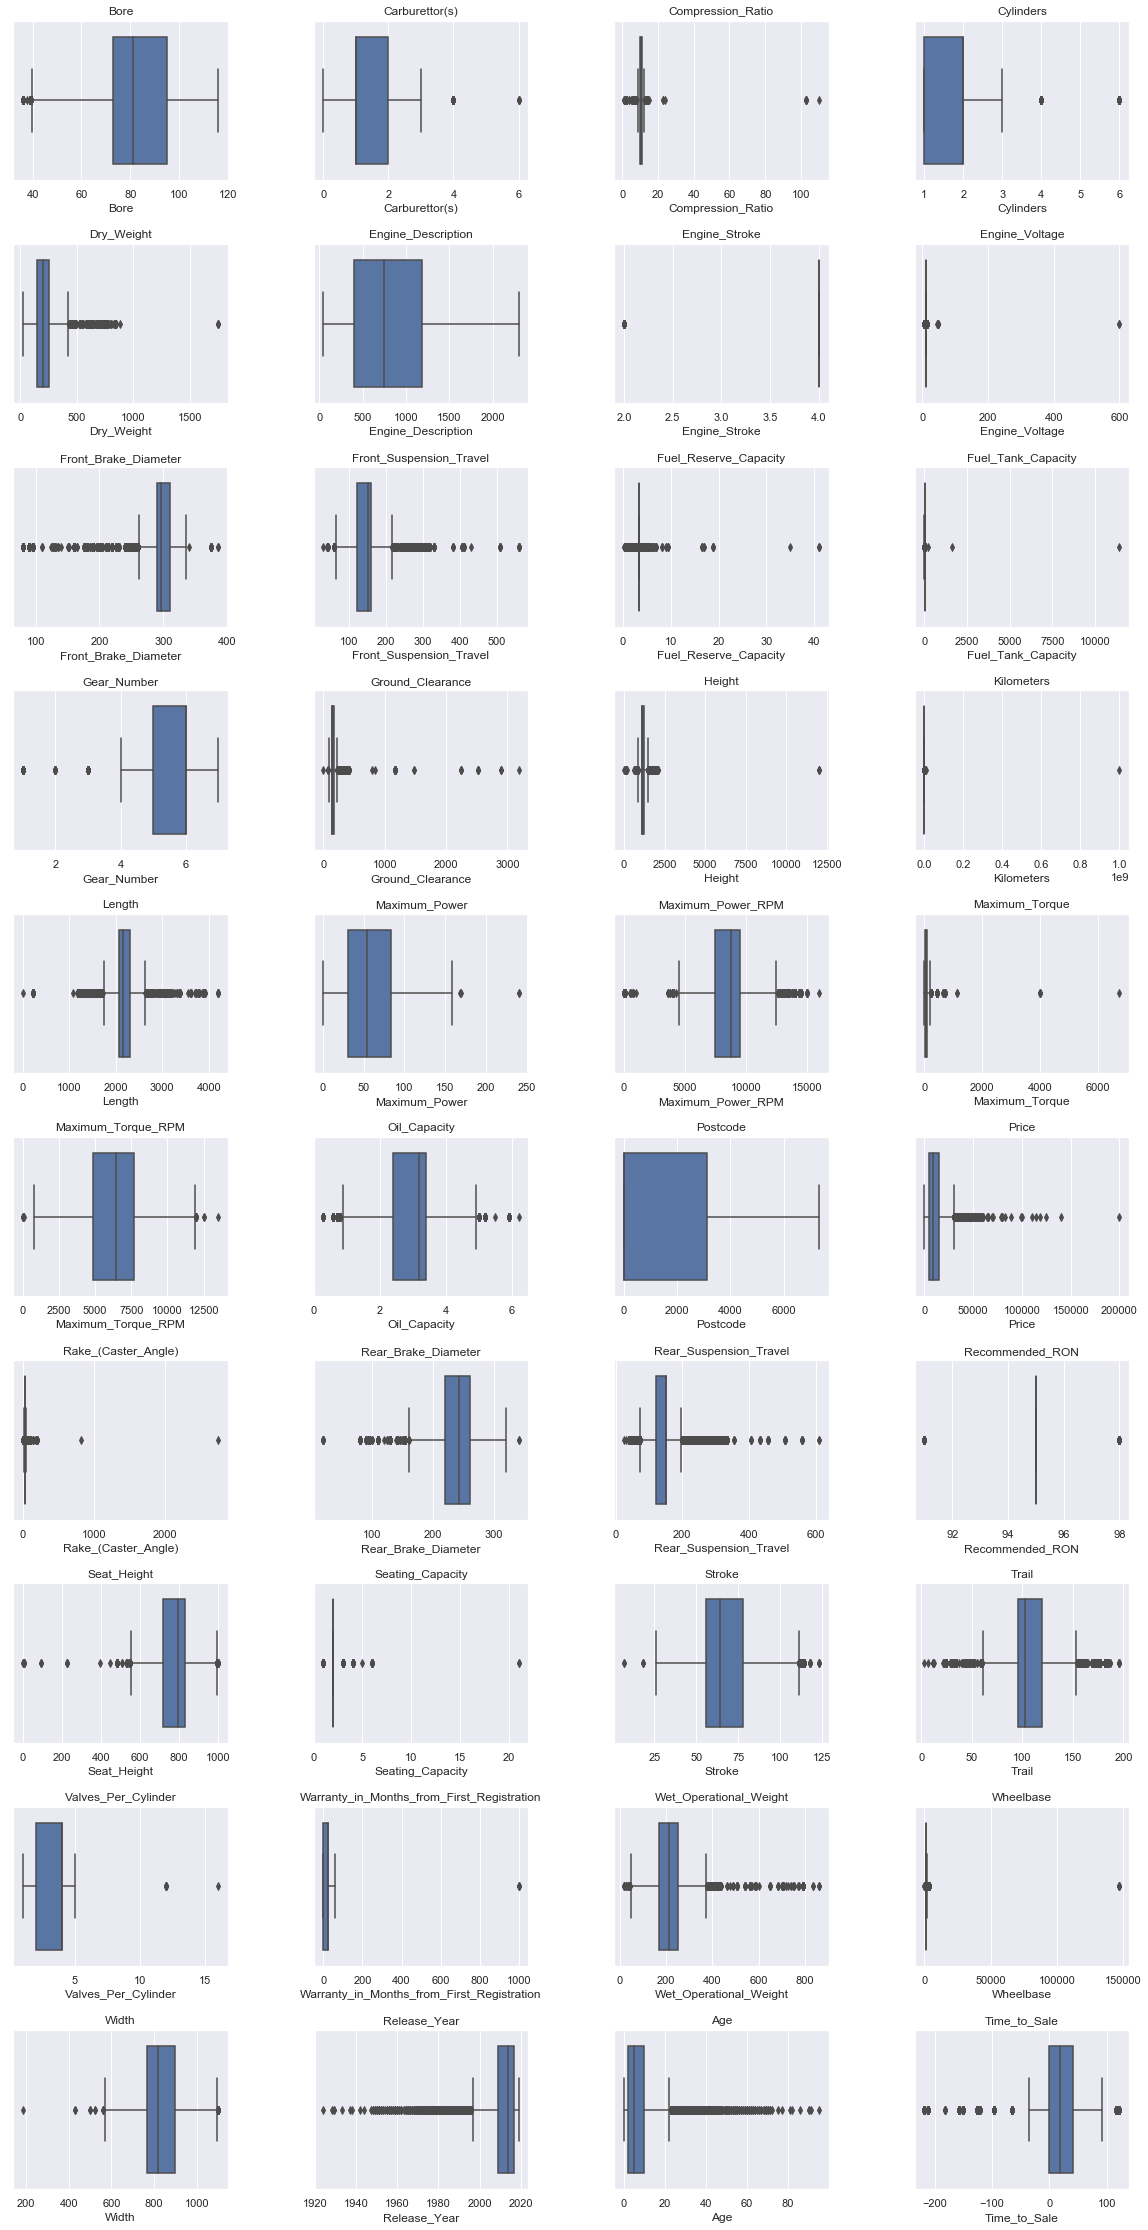

In [32]:
plot_box_grid(df, possible_predictors,col=4)

In [33]:
numerical_features = list(df.select_dtypes(include='number').columns)
#categorical_features = list(df.select_dtypes(exclude='number').columns)

# categorical_features = ['Bike', 'Body', 'Colour', 'Cooling', 'Country_of_Origin', 
#                         'Engine_Config', 'Fuel_Type', 'State', 'Suburb', 'Seller', 
#                         'Brand', 'Model'] # (21396, 11974)

categorical_features = ['Bike', 'Body', 'Brand', 'Model', 'Seller'] # (21396, 8785)

In [34]:
def add_dummy_variables(df, categorical_features):
    
    additional = pd.get_dummies(df[categorical_features])
    df[additional.columns] = additional
    return df.drop(categorical_features, axis=1)
    


In [35]:
sport = add_dummy_variables(sport, categorical_features)

In [36]:
# numerical_features = list(sport.select_dtypes(include='number').columns)
# sport = sport[numerical_features]
# sport.drop(['Time_to_Sale'], axis=1, inplace=True)
# sport.shape # (5343, 1463)



In [37]:
sport.head()

,ABS,Adjustable_Seat,Bore,Cam_Type,Carburettor,Carburettor(s),Charging_Method,Clutch_Type,Colour,Compression_Ratio,...,Model_spyder rss se5,Model_spyder rss sm5,Model_spyder st limited se5,Model_spyder st sm5,Model_turismo veloce 800 rc scs,Model_turismo veloce rc,Model_v1000,Model_v11 sport,Seller_Dealer,Seller_Private
1,No,No,77.000,SOHC (Single Over Head Cam),Electronic fuel injection,1.0,Engine,Multi plate,Red,11.000000,...,0,0,0,0,0,0,0,0,0,1
3,No,No,74.319,DOHC (Double Over Head Cam),Constant velocity,4.0,Engine,Multi plate,Black,10.463877,...,0,0,0,0,0,0,0,0,0,1
8,No,No,74.000,DOHC (Double Over Head Cam),Electronic fuel injection,4.0,Engine,Multi plate,Gold,11.000000,...,0,0,0,0,0,0,0,0,0,1
17,No,No,62.000,DOHC (Double Over Head Cam),Constant velocity,2.0,Engine,Multi plate,Black,10.463877,...,0,0,0,0,0,0,0,0,0,1
32,No,No,62.000,DOHC (Double Over Head Cam),Constant velocity,2.0,Engine,Multi plate,Black,10.463877,...,0,0,0,0,0,0,0,0,0,1


In [38]:
sport.describe()

,Bore,Carburettor(s),Compression_Ratio,Cylinders,Dry_Weight,Engine_Description,Engine_Stroke,Engine_Voltage,Front_Brake_Diameter,Front_Suspension_Travel,...,Model_spyder rss se5,Model_spyder rss sm5,Model_spyder st limited se5,Model_spyder st sm5,Model_turismo veloce 800 rc scs,Model_turismo veloce rc,Model_v1000,Model_v11 sport,Seller_Dealer,Seller_Private
count,5343.00000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,...,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000
mean,77.62648,2.874041,11.211636,2.897436,201.441739,775.790941,3.998503,12.226277,305.230925,140.110426,...,0.000749,0.000187,0.000374,0.000561,0.000187,0.000374,0.000187,0.000187,0.426352,0.573648
std,12.61538,1.184910,3.604493,1.054646,65.154006,322.090346,0.054707,11.384037,15.071462,37.079565,...,0.027354,0.013681,0.019346,0.023691,0.013681,0.019346,0.013681,0.013681,0.494593,0.494593
min,48.00000,0.000000,1.000000,1.000000,62.000000,80.000000,2.000000,12.000000,135.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.00000,2.000000,10.463877,2.000000,170.000000,600.000000,4.000000,12.000000,296.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,76.00000,4.000000,11.000000,3.000000,196.000000,800.000000,4.000000,12.000000,310.000000,127.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,82.00000,4.000000,12.000000,4.000000,225.000000,1000.000000,4.000000,12.000000,320.000000,158.312257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,116.00000,4.000000,110.000000,4.000000,838.600000,1400.000000,4.000000,600.000000,386.000000,559.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
